In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [3]:
all_data = pd.concat([train, test], axis=0)

In [4]:
all_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0.0


In [5]:
all_data.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0,NaN
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0,NaN
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0,NaN
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN,NaN


In [6]:
all_data.shape

(2534175, 19)

In [7]:
#view the data types in the train data
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534175 entries, 0 to 380126
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
dtypes: float64(13), int64(1), object(5)
memory usage: 386.7+ MB


In [8]:
train = all_data[:2104048]

In [9]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0.0


In [10]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2104043,fa0c3d137825cd4fc4ac0df9c00070f286df9337,MATAM,K > 24 month,NaN,NaN,NaN,NaN,NaN,130.0,4.0,NaN,NaN,NaN,NaN,NO,58,NaN,NaN,0.0
2104044,fa0c40d93e7b60618ce09d2dd9c799e017b27174,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,22.0,0.0,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0.0
2104045,fa0c420a4ab36b3bbd1f708899a0ee899a52a73c,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1.0
2104046,fa0c467bf2d6403e47ca9439641dd46db2ea84d4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,24,NaN,NaN,0.0
2104047,fa0c4adf7c92dec60cf3a3986fecea954efa0b5c,FATICK,K > 24 month,3700.0,10.0,3700.0,1233.0,8.0,NaN,146.0,91.0,36.0,NaN,NaN,NO,45,Mixt 250F=Unlimited_call24H,4.0,0.0


In [11]:
train.shape

(2104048, 19)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104048 entries, 0 to 2104047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
dtypes: float64(13), int64(1), object(5)
memory usage: 321.1+ MB


In [13]:
sample_test = all_data[2104048:]
test = sample_test.drop('CHURN', axis=1)

In [14]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
2104048,fa0c66400eea3f206f5d1a08abd307bedf571dc7,KAFFRINE,K > 24 month,10350.0,26.0,12250.0,4083.0,38.0,0.0,2853.0,230.0,12.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,25.0
2104049,fa0c6bdab83d1aeaf9136fbc356592568c5965e4,SAINT-LOUIS,K > 24 month,12000.0,22.0,12000.0,4000.0,23.0,1222.0,270.0,324.0,6.0,NaN,NaN,NO,59,MIXT:500F= 2500F on net _2500F off net;2d,21.0
2104050,fa0c8a9645cc10bf95313fa07af73452b52cdd7d,NaN,K > 24 month,500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
2104051,fa0c911a9c3fbbcef0280a36e55cb0fbe95c8927,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
2104052,fa0c9c069e2646e08d2f0ac66d718be915cfba07,DAKAR,K > 24 month,21350.0,60.0,20303.0,6768.0,67.0,6422.0,6192.0,36.0,3.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,39.0


In [15]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [16]:
test.shape

(430127, 18)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430127 entries, 2104048 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         430127 non-null  object 
 1   REGION          260813 non-null  object 
 2   TENURE          430127 non-null  object 
 3   MONTANT         279602 non-null  float64
 4   FREQUENCE_RECH  279602 non-null  float64
 5   REVENUE         286046 non-null  float64
 6   ARPU_SEGMENT    286046 non-null  float64
 7   FREQUENCE       286046 non-null  float64
 8   DATA_VOLUME     218536 non-null  float64
 9   ON_NET          273455 non-null  float64
 10  ORANGE          252314 non-null  float64
 11  TIGO            173380 non-null  float64
 12  ZONE1           33810 non-null   float64
 13  ZONE2           27281 non-null   float64
 14  MRG             430127 non-null  object 
 15  REGULARITY      430127 non-null  int64  
 16  TOP_PACK        250521 non-null  object 
 17  FREQ

In [18]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [19]:
submission.shape

(380127, 2)

In [20]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          501401
THIES          175806
SAINT-LOUIS    116967
LOUGA           96786
KAOLACK         94671
DIOURBEL        65355
TAMBACOUNDA     53834
KAFFRINE        42932
KOLDA           37832
FATICK          34874
MATAM           28391
ZIGUINCHOR      21446
SEDHIOU          3044
KEDOUGOU          996
Name: REGION, dtype: int64


Text(0.5, 0, 'Regions')

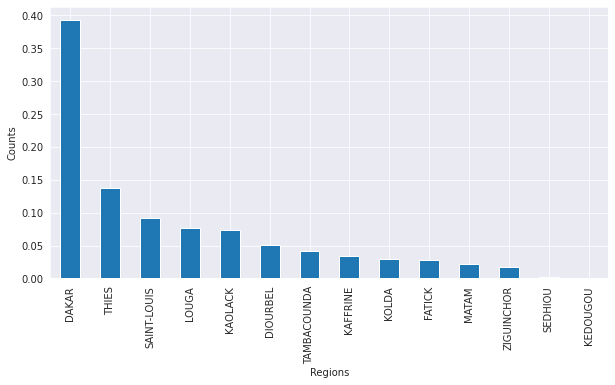

In [21]:
print(train['REGION'].value_counts())
#print(pd.value_counts(train['REGION']))
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Regions')

K > 24 month     1995772
I 18-21 month      44220
H 15-18 month      25430
G 12-15 month      14548
J 21-24 month      12419
F 9-12 month        9122
E 6-9 month         1788
D 3-6 month          749
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

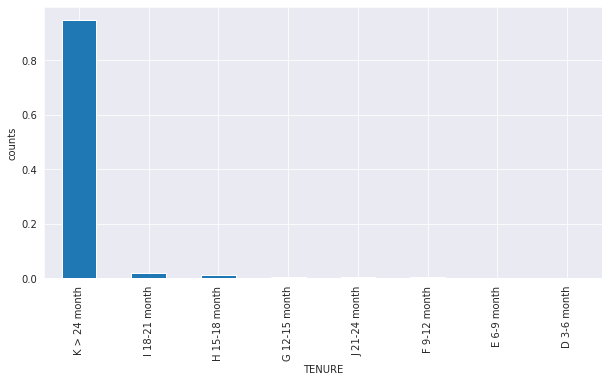

In [22]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2104048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

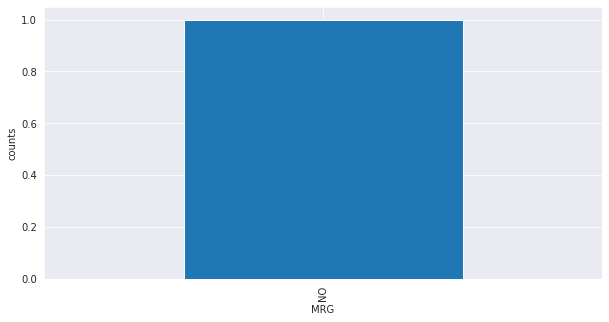

In [23]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d             310422
On net 200F=Unlimited _call24H    148730
Data:490F=1GB,7d                  112497
Data: 100 F=40MB,24H               82710
Mixt 250F=Unlimited_call24H        65965
                                   ...  
CVM_150F_unlimited                     1
YMGX on-net 100=700F, 24H              1
Postpaid FORFAIT 10H Package           1
pilot_offer5                           1
Package3_Monthly                       1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

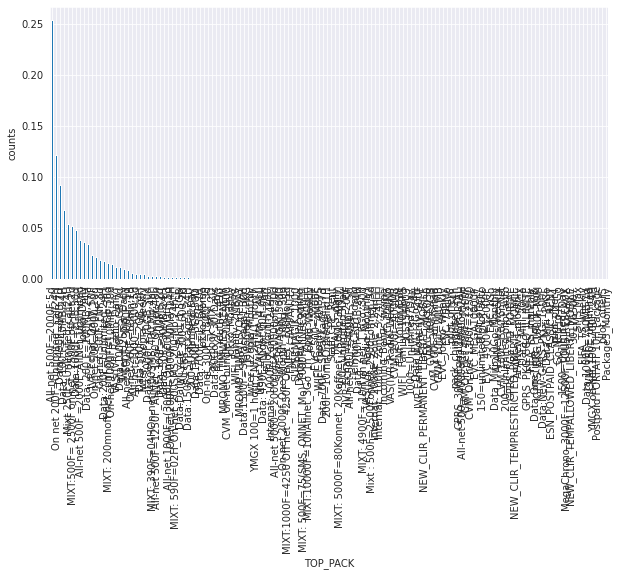

In [24]:
#probably not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0.0    1709327
1.0     394721
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

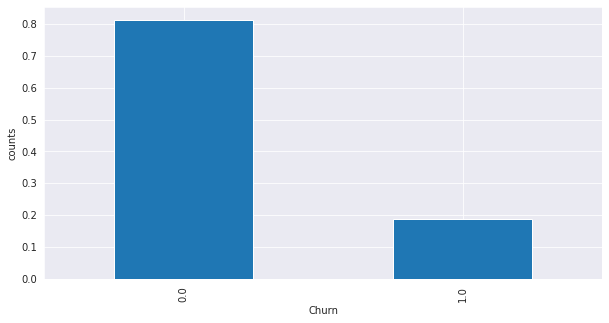

In [25]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [26]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1364779.0,5530.763030,7107.671085,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1364779.0,11.527204,13.269460,1.0,2.0,7.0,16.0,133.0
REVENUE,1394708.0,5509.871633,7184.140380,1.0,1000.0,3000.0,7369.0,532177.0
ARPU_SEGMENT,1394708.0,1836.630004,2394.709200,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1394708.0,13.976850,14.689740,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1068166.0,3368.759399,13341.577464,0.0,0.0,257.0,2896.0,1823866.0
ON_NET,1335531.0,277.520198,872.537729,0.0,5.0,27.0,156.0,50809.0
ORANGE,1229383.0,95.406763,204.976407,0.0,7.0,29.0,99.0,21323.0
TIGO,843778.0,23.092223,63.461211,0.0,2.0,6.0,20.0,4174.0
ZONE1,165772.0,8.158145,41.095730,0.0,0.0,1.0,3.0,4792.0


In [27]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             829713
TENURE                  0
MONTANT            739269
FREQUENCE_RECH     739269
REVENUE            709340
ARPU_SEGMENT       709340
FREQUENCE          709340
DATA_VOLUME       1035882
ON_NET             768517
ORANGE             874665
TIGO              1260270
ZONE1             1938276
ZONE2             1970429
MRG                     0
REGULARITY              0
TOP_PACK           881767
FREQ_TOP_PACK      881767
CHURN                   0
dtype: int64

In [28]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            169314
TENURE                 0
MONTANT           150525
FREQUENCE_RECH    150525
REVENUE           144081
ARPU_SEGMENT      144081
FREQUENCE         144081
DATA_VOLUME       211591
ON_NET            156672
ORANGE            177813
TIGO              256747
ZONE1             396317
ZONE2             402846
MRG                    0
REGULARITY             0
TOP_PACK          179606
FREQ_TOP_PACK     179606
dtype: int64

In [29]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [30]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [31]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0.0


In [32]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [33]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
2104048,fa0c66400eea3f206f5d1a08abd307bedf571dc7,K > 24 month,10350.0,26.0,12250.0,4083.0,38.0,0.0,2853.0,230.0,12.0,NaN,NaN,59,25.0
2104049,fa0c6bdab83d1aeaf9136fbc356592568c5965e4,K > 24 month,12000.0,22.0,12000.0,4000.0,23.0,1222.0,270.0,324.0,6.0,NaN,NaN,59,21.0
2104050,fa0c8a9645cc10bf95313fa07af73452b52cdd7d,K > 24 month,500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2104051,fa0c911a9c3fbbcef0280a36e55cb0fbe95c8927,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2104052,fa0c9c069e2646e08d2f0ac66d718be915cfba07,K > 24 month,21350.0,60.0,20303.0,6768.0,67.0,6422.0,6192.0,36.0,3.0,NaN,NaN,62,39.0


In [34]:
#Fill NAs for train data

In [35]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [36]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.00000,15.000000,4251.000000,1417.000000,17.00000,4.000000,388.000000,46.000000,1.000000,1.000000,2.0000,54,8.000000,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5530.76303,11.527204,5509.871633,1836.630004,13.97685,3368.759399,277.520198,95.406763,23.092223,8.158145,7.5449,4,9.270295,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.00000,2.000000,1020.000000,340.000000,2.00000,3368.759399,90.000000,46.000000,7.000000,8.158145,7.5449,17,1.000000,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.00000,15.000000,13502.000000,4501.000000,18.00000,43804.000000,41.000000,102.000000,2.000000,8.158145,7.5449,62,11.000000,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.00000,1.000000,985.000000,328.000000,1.00000,3368.759399,39.000000,24.000000,23.092223,8.158145,7.5449,11,2.000000,0.0


In [37]:
train.tail()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
2104043,fa0c3d137825cd4fc4ac0df9c00070f286df9337,K > 24 month,5530.76303,11.527204,5509.871633,1836.630004,13.97685,130.000000,4.000000,95.406763,23.092223,8.158145,7.5449,58,9.270295,0.0
2104044,fa0c40d93e7b60618ce09d2dd9c799e017b27174,K > 24 month,5530.76303,11.527204,5509.871633,1836.630004,13.97685,22.000000,0.000000,95.406763,23.092223,8.158145,7.5449,2,9.270295,0.0
2104045,fa0c420a4ab36b3bbd1f708899a0ee899a52a73c,I 18-21 month,5530.76303,11.527204,5509.871633,1836.630004,13.97685,3368.759399,277.520198,95.406763,23.092223,8.158145,7.5449,5,9.270295,1.0
2104046,fa0c467bf2d6403e47ca9439641dd46db2ea84d4,K > 24 month,5530.76303,11.527204,5509.871633,1836.630004,13.97685,0.000000,277.520198,95.406763,23.092223,8.158145,7.5449,24,9.270295,0.0
2104047,fa0c4adf7c92dec60cf3a3986fecea954efa0b5c,K > 24 month,3700.00000,10.000000,3700.000000,1233.000000,8.00000,3368.759399,146.000000,91.000000,36.000000,8.158145,7.5449,45,4.000000,0.0


In [38]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [39]:
#Fill NAs for test data

In [40]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [41]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
2104048,fa0c66400eea3f206f5d1a08abd307bedf571dc7,K > 24 month,10350.000000,26.000000,12250.000000,4083.000000,38.00000,0.00000,2853.000000,230.000000,12.000000,8.224076,7.684506,59,25.000000
2104049,fa0c6bdab83d1aeaf9136fbc356592568c5965e4,K > 24 month,12000.000000,22.000000,12000.000000,4000.000000,23.00000,1222.00000,270.000000,324.000000,6.000000,8.224076,7.684506,59,21.000000
2104050,fa0c8a9645cc10bf95313fa07af73452b52cdd7d,K > 24 month,500.000000,1.000000,5505.552775,1835.189882,13.96661,3337.17868,279.501326,95.277539,23.141643,8.224076,7.684506,1,9.273418
2104051,fa0c911a9c3fbbcef0280a36e55cb0fbe95c8927,K > 24 month,5532.400555,11.530282,5505.552775,1835.189882,13.96661,3337.17868,279.501326,95.277539,23.141643,8.224076,7.684506,1,9.273418
2104052,fa0c9c069e2646e08d2f0ac66d718be915cfba07,K > 24 month,21350.000000,60.000000,20303.000000,6768.000000,67.00000,6422.00000,6192.000000,36.000000,3.000000,8.224076,7.684506,62,39.000000


In [42]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [44]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2104048, 14)
(2104048,)
(430127, 14)


In [45]:
#Split training data into train and test split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x, y, random_state=0)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1578036, 14)
(1578036,)
(526012, 14)
(526012,)


In [47]:
#Standardize numeric columns

In [48]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [49]:
scaler = StandardScaler()

In [50]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [51]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
368911,K > 24 month,-0.180549,-0.330069,-0.224605,-0.224780,-0.332567,-0.251873,-0.166061,-0.595413,-0.000421,-0.000156,0.000985,-0.180948,-0.457302
1557337,K > 24 month,0.000173,0.000356,0.000138,0.000138,0.000220,-0.000333,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-1.213050,0.000533
388684,K > 24 month,5.605309,4.353878,5.748751,5.748586,3.935165,0.743965,0.707078,1.998510,6.281521,-0.000156,0.000985,1.524264,6.082747
111707,K > 24 month,0.000173,0.000356,0.000138,0.000138,0.000220,-0.000333,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-1.168176,0.000533
868579,K > 24 month,0.000173,0.000356,0.000138,0.000138,0.000220,-0.115404,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-0.225822,0.000533


In [52]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [53]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1840372,K > 24 month,-0.881865,-0.985821,-0.860094,-0.859927,-1.085696,-0.245097,-0.387217,-0.538054,-0.472783,-0.000156,0.000985,-0.539940,-0.886158
1065560,K > 24 month,-0.689003,-0.704784,-0.671216,-0.671392,-0.834653,-0.348100,-0.233556,-0.391468,-0.000421,-0.000156,0.000985,-0.225822,-0.778944
560735,K > 24 month,0.257773,0.044647,0.184917,0.184743,0.336881,-0.000333,2.744878,-0.512561,-0.299595,-0.000156,0.000985,0.537036,0.507623
235494,K > 24 month,-0.811734,-0.611106,-0.827469,-0.827474,-0.332567,-0.351541,-0.227812,-0.601787,-0.522265,-0.103726,0.000985,1.165272,0.000533
1818588,K > 24 month,-0.268214,-0.423748,-0.435290,-0.435466,-0.416248,-0.000333,-0.371420,-0.130164,0.046779,-0.000156,0.000985,0.581910,0.000533


In [54]:
test[num_cols] = scaler.transform(test[num_cols])

In [55]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
2104048,K > 24 month,0.845126,1.356152,1.157468,1.157295,2.010501,-0.351541,3.698437,0.857694,-0.274854,0.00574,0.019204,1.389642,1.686976
2104049,K > 24 month,1.134419,0.981436,1.114541,1.114540,0.755286,-0.224142,-0.010964,1.456782,-0.423300,0.00574,0.019204,1.389642,1.258121
2104050,K > 24 month,-0.881865,-0.985821,-0.000604,-0.000604,-0.000637,-0.003625,0.002681,-0.000930,0.000802,0.00574,0.019204,-1.213050,0.000868
2104051,K > 24 month,0.000461,0.000644,-0.000604,-0.000604,-0.000637,-0.003625,0.002681,-0.000930,0.000802,0.00574,0.019204,-1.213050,0.000868
2104052,K > 24 month,2.773745,4.541236,2.540227,2.540400,4.437251,0.317981,8.493516,-0.378722,-0.497524,0.00574,0.019204,1.524264,3.187971


In [56]:
#Encode the TENURE column

In [57]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [58]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [59]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
368911,7,-0.180549,-0.330069,-0.224605,-0.224780,-0.332567,-0.251873,-0.166061,-0.595413,-0.000421,-0.000156,0.000985,-0.180948,-0.457302
1557337,7,0.000173,0.000356,0.000138,0.000138,0.000220,-0.000333,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-1.213050,0.000533
388684,7,5.605309,4.353878,5.748751,5.748586,3.935165,0.743965,0.707078,1.998510,6.281521,-0.000156,0.000985,1.524264,6.082747
111707,7,0.000173,0.000356,0.000138,0.000138,0.000220,-0.000333,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-1.168176,0.000533
868579,7,0.000173,0.000356,0.000138,0.000138,0.000220,-0.115404,-0.000164,-0.000106,-0.000421,-0.000156,0.000985,-0.225822,0.000533


In [60]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
2104048,K > 24 month,0.845126,1.356152,1.157468,1.157295,2.010501,-0.351541,3.698437,0.857694,-0.274854,0.00574,0.019204,1.389642,1.686976
2104049,K > 24 month,1.134419,0.981436,1.114541,1.114540,0.755286,-0.224142,-0.010964,1.456782,-0.423300,0.00574,0.019204,1.389642,1.258121
2104050,K > 24 month,-0.881865,-0.985821,-0.000604,-0.000604,-0.000637,-0.003625,0.002681,-0.000930,0.000802,0.00574,0.019204,-1.213050,0.000868
2104051,K > 24 month,0.000461,0.000644,-0.000604,-0.000604,-0.000637,-0.003625,0.002681,-0.000930,0.000802,0.00574,0.019204,-1.213050,0.000868
2104052,K > 24 month,2.773745,4.541236,2.540227,2.540400,4.437251,0.317981,8.493516,-0.378722,-0.497524,0.00574,0.019204,1.524264,3.187971


### GridSearchCV combiné avec SVC et Random Forest Classifier

In [61]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [62]:
param_grid = [
{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'classifier': [RandomForestClassifier(n_estimators=100)],
'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree = DecisionTreeClassifier(max_depth=8,random_state=0)

In [63]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [64]:
tree.score(X_test, y_test)

0.8652996509585332

In [65]:
tree.score(X_train, y_train)

0.8652280429597297

Etudier tree.score(X_test, y_test) et tree.score(X_train, y_test) nous permettrait de verifier un possible cas underfitting. Dans ce cas les deux scores sont assez proches donc il n'y a pas de underfitting dans notre model.